**ESERCIZITAZIONE 1:**

E' riportata l'analisi dati dei tre esercizi dell'esercitazione 1.

**Esercizio 1.1:** A partire da un generatore di numeri pseudo-casuali sull'intervallo [0,1] con distribuzione uniforme, si è calcolata l'evoluzione del valor medio al variare del numero complessivo N di batch numeri generati, con annessa la deviazione standard della media. Stampando i risultati su un blocco di testo average.out, si è riprodotto un grafico che riporta i valori della media globale, con le barre d'errore associate alla deviazione standard della media, al variare di N:

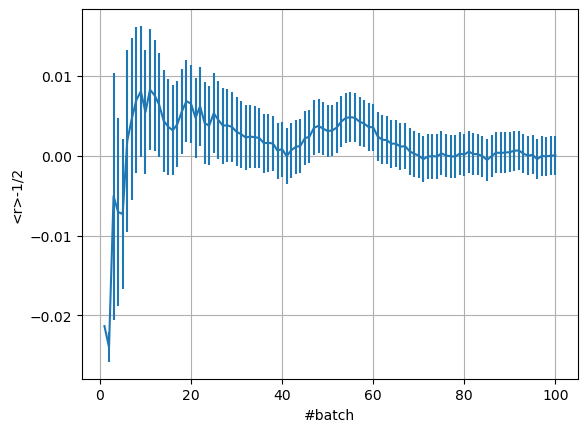

In [6]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Lettura file
filename = "Codici_finali/Esercizio_1.1/average.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1) , names = ('Media' , 'Stdev_Media') )

#estrarre i dati dalle colonne del file di testo
MED['Media'] = pd.to_numeric(MED['Media'] , errors = 'coerce')
MED['Stdev_Media'] = pd.to_numeric(MED['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Media_vector = MED['Media']
Stdev_Media_vector = MED['Stdev_Media']

#generare Array di interi da 1 a N
N = 100;
N_vector = np.zeros(N)

for i in range(0,N):
    N_vector[i] = i+1;

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.errorbar(N_vector, Media_vector - 0.5, yerr = Stdev_Media_vector)
plt.xlabel('#batch')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

Si effettua la stessa operazione usando come variabile la deviazione standard:

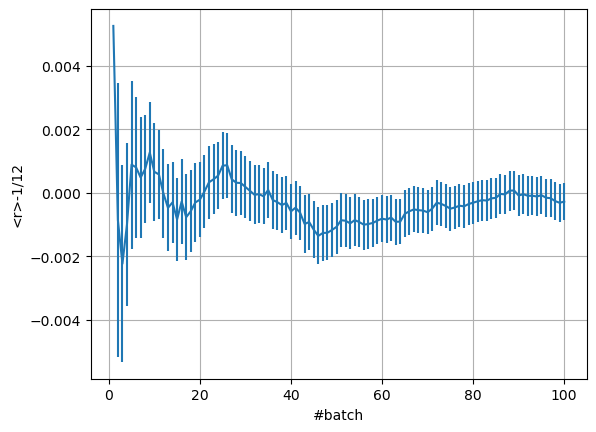

In [7]:
#Lettura file
filename = "Codici_finali/Esercizio_1.1/variance.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1) , names = ('Stdev' , 'Stdev_Stdev') )

#estrarre i dati dalle colonne del file di testo
MED['Stdev'] = pd.to_numeric(MED['Stdev'] , errors = 'coerce')
MED['Stdev_Stdev'] = pd.to_numeric(MED['Stdev_Stdev'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Stdev_vector = MED['Stdev']
Stdev_Stdev_vector = MED['Stdev_Stdev']

#generare Array di interi da 1 a N
N = 100;
N_vector = np.zeros(N)

for i in range(0,N):
    N_vector[i] = i+1;

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.errorbar(N_vector, Stdev_vector - 1/12, yerr = Stdev_Stdev_vector)
plt.xlabel('#batch')
plt.ylabel('<r>-1/12')
plt.grid(True)
plt.show()

Il successivo problema richiede lo studio della statistica della variabile $\chi^2$, campionata generando $10^4$ numeri pseudo-casuali distribuiti uniformemente sull'intervallo $[0,1]$. Nello specifico, la variabile è calcolata suddividendo tale range in $100$ sotto-intervalli di uguale ampiezza e conteggiando il numero $n_i$ di numeri che cadono all'interno del sotto-intervallo $i$-esimo. Data $E = 100$ il numero atteso di punti all'interno di ogni intervallo:

$$\chi^2 = \sum_{i=1}^{100} \frac{(n_i - E)^2}{E}$$

La statistica della variabile $\chi ^2$ è dunque accumulata ripetendo 100 volte la generazione di $10^4$ numeri su $[0,1]$, senza mai resettare il generatore di variabili pseudo-casuali. E' pertanto opportuno calcolare valor medio e varianza di $\chi^2$, oltre che la sua distribuzione.

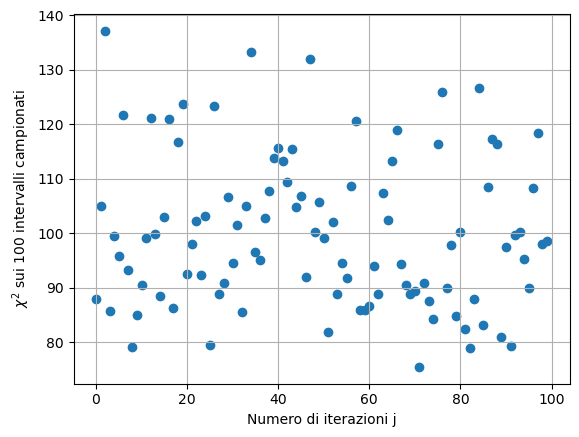

Valor medio della variabile $\chi ^2$  100.03799999999997
Varianza della variabile $\chi ^2  192.49065454545453


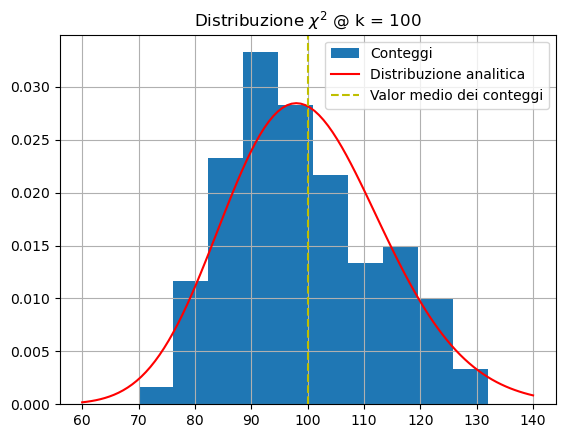

In [8]:
#Lettura file

from scipy.stats import chi2

filename = "Codici_finali/Esercizio_1.1/chi_test.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1) , names = ('Interval' , 'Chi'), header = 0 )

#estrarre i dati dalle colonne del file di testo
MED['Interval'] = pd.to_numeric(MED['Interval'] , errors = 'coerce')
MED['Chi'] = pd.to_numeric(MED['Chi'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Interval_vector = MED['Interval']
Chi_vector = MED['Chi']

#grafico che mostra, al variare dell'intervallo di larghezza 0.01, il numero di conteggi
plt.scatter(Interval_vector, Chi_vector)
plt.grid(True)
plt.xlabel("Numero di iterazioni j")
plt.ylabel(r'$\chi ^2$ sui 100 intervalli campionati')
plt.show()

#statistica della variabile chi-quadro
average = np.sum(Chi_vector)/100; #Media della variabile Chi-quadro
print(r'Valor medio della variabile $\chi ^2$ ', average)

variance = np.var(Chi_vector, ddof = 1) #Varianza della variabile Chi-quadro
print(r'Varianza della variabile $\chi ^2 ' , variance)


#disegnare il grafico della funzione analitica corrispondente alla distribuzione chi-quadro
#si ha k = 100
x = np.linspace(60, 140, 100)
k=100
pdf = chi2.pdf(x, k)

#Fit della distribuzione Chi-quadro a partire dai conteggi 
#df_fit, loc_fit, scale_fit = chi2.fit(Chi_vector)
#pdff = chi2.pdf(x, df_fit, loc=loc_fit, scale=scale_fit)

num_bins = 10
bin_edges = np.linspace(np.min(70), np.max(132), num_bins + 1)
translation_value = 0.0
translated_bin_edges = bin_edges + translation_value

plt.hist(Chi_vector, bins = translated_bin_edges, density = True, label = r'Conteggi')
plt.title(r'Distribuzione $\chi^2$ @ k = 100')
plt.plot(x, pdf, label=r'Distribuzione analitica', color='red')
#plt.plot(x, pdff, label = r'Fit della Distribuzione sui dati')
plt.axvline(x=average, color='y', linestyle='--', label='Valor medio dei conteggi')
plt.grid(True)
plt.legend()
plt.show()

Dai conteggi della distribuzione $\chi^2$ si è calcolata una media pari a circa $100$ e una varianza di poco inferiore al doppio. Inoltre, dall'istogramma è evidente che la distribuzione di tale variabile è asimmetrica attorno al valor medio. 

E' possibile confrontare questi risultati con le previsioni teoriche. La distribuzione analitica è raffigurata dalla funzione evidenziata in rosso, corrispondente alla formula prevista dalla teoria:

$$\chi_k(x) = \frac{1}{2^{k/2} \ \Gamma(k/2)} x^{k/2 - 1}e^{-x/2}  \ \ , con \ k = 100$$

Tale distribuzione presenta un valor medio $<\chi^2>$ pari a $k = 100$ e una varianza $\sigma^2(X_k) = 2k = 200$. Si osserva immediatamente una sottostima della varianza calcolata a partire dai conteggi sperimentali, oltre che una scarsa qualità del profilo dell'istogramma. E' pertanto opportuno verificare se questi risultati siano dovuti alla scarsità di statistica accumulata, provando pertanto a confrontarli con quelli ottenuti campionando $1000$ volte anzichè $100$ la variabile $\chi^2$.

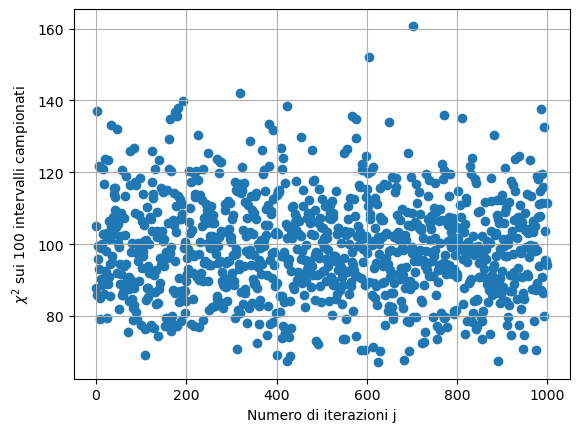

Valor medio della variabile $\chi ^2$  99.08918000000001
Varianza della variabile $\chi ^2  192.7880802078075


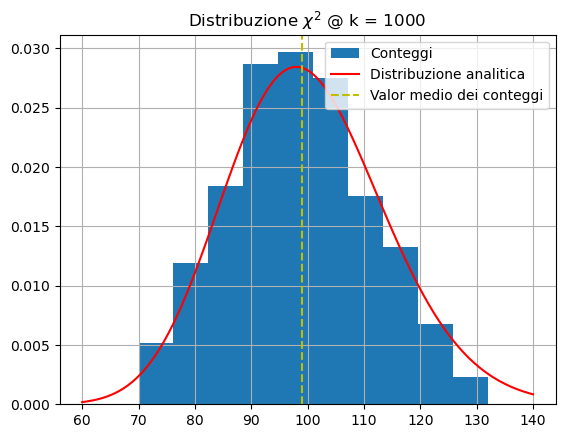

In [9]:
#Lettura file

filename = "Codici_finali/Esercizio_1.1/chi_test_alt.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1) , names = ('Interval' , 'Chi'), header = 0 )

#estrarre i dati dalle colonne del file di testo
MED['Interval'] = pd.to_numeric(MED['Interval'] , errors = 'coerce')
MED['Chi'] = pd.to_numeric(MED['Chi'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Interval_vector = MED['Interval']
Chi_vector = MED['Chi']

#grafico che mostra, al variare dell'intervallo di larghezza 0.01, il numero di conteggi
plt.scatter(Interval_vector, Chi_vector)
plt.grid(True)
plt.xlabel("Numero di iterazioni j")
plt.ylabel(r'$\chi ^2$ sui 100 intervalli campionati')
plt.show()

#statistica della variabile chi-quadro
average = np.sum(Chi_vector)/1000; #Media della variabile Chi-quadro
print(r'Valor medio della variabile $\chi ^2$ ', average)

variance = np.var(Chi_vector, ddof = 1) #Varianza della variabile Chi-quadro
print(r'Varianza della variabile $\chi ^2 ' , variance)


#disegnare il grafico della funzione analitica corrispondente alla distribuzione chi-quadro
#si ha k = 100
x = np.linspace(60, 140, 100)
k=100
pdf = chi2.pdf(x, k)

#Fit della distribuzione Chi-quadro a partire dai conteggi 
#df_fit, loc_fit, scale_fit = chi2.fit(Chi_vector)
#pdff = chi2.pdf(x, df_fit, loc=loc_fit, scale=scale_fit)

num_bins = 10
bin_edges = np.linspace(np.min(70), np.max(132), num_bins + 1)
translation_value = 0.0
translated_bin_edges = bin_edges + translation_value

plt.hist(Chi_vector, bins = translated_bin_edges, density = True, label = r'Conteggi')
plt.title(r'Distribuzione $\chi^2$ @ k = 1000')
plt.plot(x, pdf, label=r'Distribuzione analitica', color='red')
#plt.plot(x, pdff, label = r'Fit della Distribuzione sui dati')
plt.axvline(x=average, color='y', linestyle='--', label='Valor medio dei conteggi')
plt.grid(True)
plt.legend()
plt.show()

Sia dal calcolo di media e varianza che dall'istogramma si osserva come la discrepanza sia dovuta principalmente a come sono disposti i bin dell'istogramma: avendo pochi dati a disposizione nel caso di $k = 100$, la scelta dell'ampiezza e delle posizione dei singoli bin influisce sulla morfologia dell'istogramma.

**Esercizio 1.2:** Partendo da una sequenza di numeri pseudo-casuali $y$ generati con una distribuzione $p_y$ uniforme sull'intervallo $[0,1]$, vengono generate due sequenze, rispettivamente di numeri $x_1$ generati con distribuzione $p_{x1}$ esponenziale e di numeri $x_2$ generati con distribuzione $p_{x2}$ di Cauchy_Lorentz:

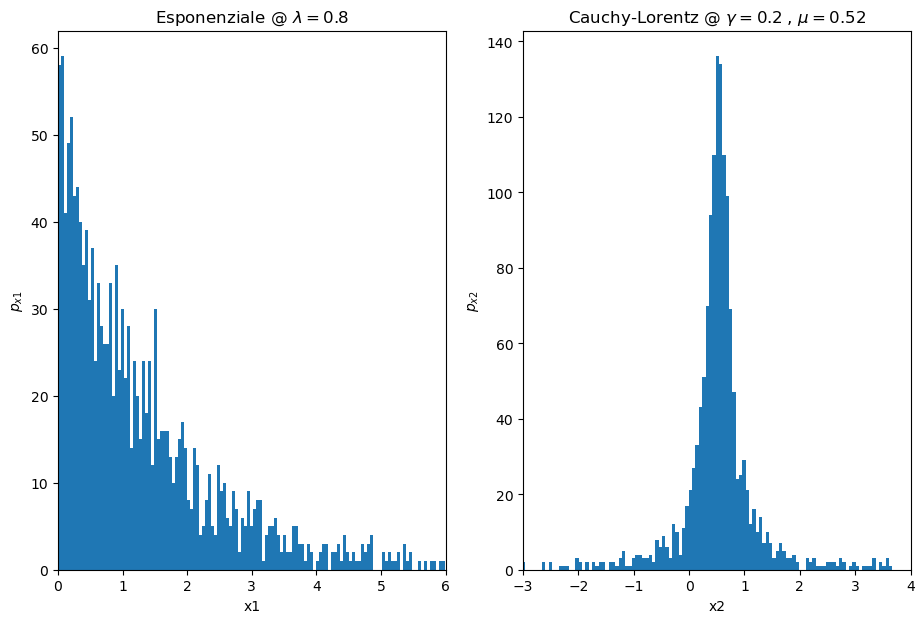

In [10]:
#Lettura file
filename = "Codici_finali/Esercizio_1.2/distributions.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('y' , 'x1' , 'x2'), header = 1 )

#estrarre i dati dalle colonne del file di testo
MED['y'] = pd.to_numeric(MED['y'] , errors = 'coerce')
MED['x1'] = pd.to_numeric(MED['x1'] , errors = 'coerce')
MED['x2'] = pd.to_numeric(MED['x2'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
y_vector = MED['y']
x1_vector = MED['x1']
x2_vector = MED['x2']

#print(min(x2_vector))

#istogramma che mostra, per ogni intervallo di valori selezionati, il numero di occorrenze
plt.figure(figsize=(17,7))
#esponenziale (lambda = 0.8)
plt.subplot(1,3,1)
plt.title(r'Esponenziale @ $\lambda = 0.8$')
plt.hist(x = x1_vector, bins = 200)
plt.xlim([0,+6]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [0,6]
plt.xlabel('x1')
plt.ylabel('$p_{x1}$')
#plt.show()

#Cauchy_Lorentz (gamma = 0.2 , mu = 0.52)
plt.subplot(1,3,2)
plt.hist(x = x2_vector, bins = 18000)
plt.title(r'Cauchy-Lorentz @ $\gamma = 0.2$ , $\mu = 0.52$')
plt.xlim([-3,+4]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [-3,4]
plt.xlabel('x2')
plt.ylabel('$p_{x2}$')
plt.show()

Ora si verifica il teorema del limite centrale, rappresentando la distribuzione della somma di $N = (2,10,100)$ numeri pseudo-casuali generati con distribuzione uniforme, esponenziale, lorentziana.
Si parte dal caso N = 2:

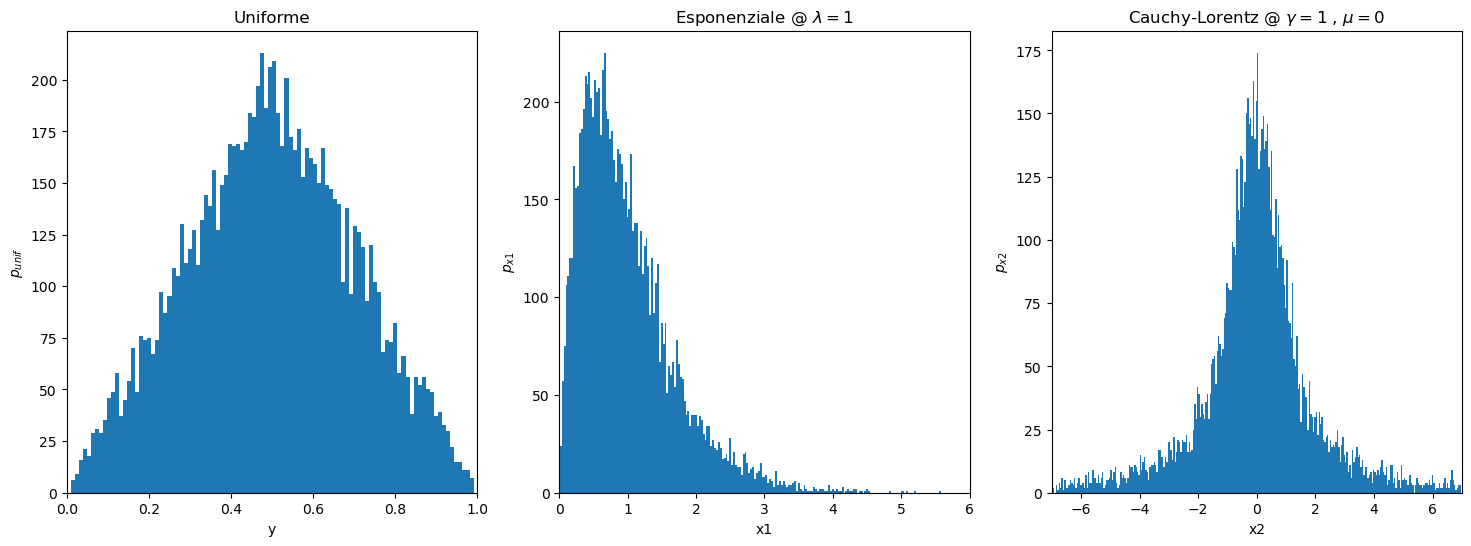

In [11]:
#Lettura file
filename = "Codici_finali/Esercizio_1.2/distributions_limit_N_2.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('y' , 'x1' , 'x2'), header = 1 )

#estrarre i dati dalle colonne del file di testo
MED['y'] = pd.to_numeric(MED['y'] , errors = 'coerce')
MED['x1'] = pd.to_numeric(MED['x1'] , errors = 'coerce')
MED['x2'] = pd.to_numeric(MED['x2'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
y_vector = MED['y']
x1_vector = MED['x1']
x2_vector = MED['x2']

#print(min(x2_vector))

#istogramma che mostra, per ogni intervallo di valori selezionati, il numero di occorrenze
plt.figure(figsize = (18,6))

#uniforme
plt.subplot(1,3,1)
plt.hist(x = y_vector, bins = 100)
plt.title(r'Uniforme')
plt.xlim([0,1]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [0,1]
plt.xlabel('y')
plt.ylabel('$p_{unif}$')
#plt.show()

#esponenziale (lambda = 0.8)
plt.subplot(1,3,2)
plt.hist(x = x1_vector, bins = 200)
plt.title(r'Esponenziale @ $\lambda = 1$')
plt.xlim([0,+6]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [0,6]
plt.xlabel('x1')
plt.ylabel('$p_{x1}$')
#plt.show()

#Cauchy_Lorentz (gamma = 0.2 , mu = 0.52)
plt.subplot(1,3,3)
plt.hist(x = x2_vector, bins = 50000)
plt.title(r'Cauchy-Lorentz @ $\gamma = 1$ , $\mu = 0$')
plt.xlim([-7,+7]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [-3,4]
plt.xlabel('x2')
plt.ylabel('$p_{x2}$')
plt.show()

N = 10:

-6658.85


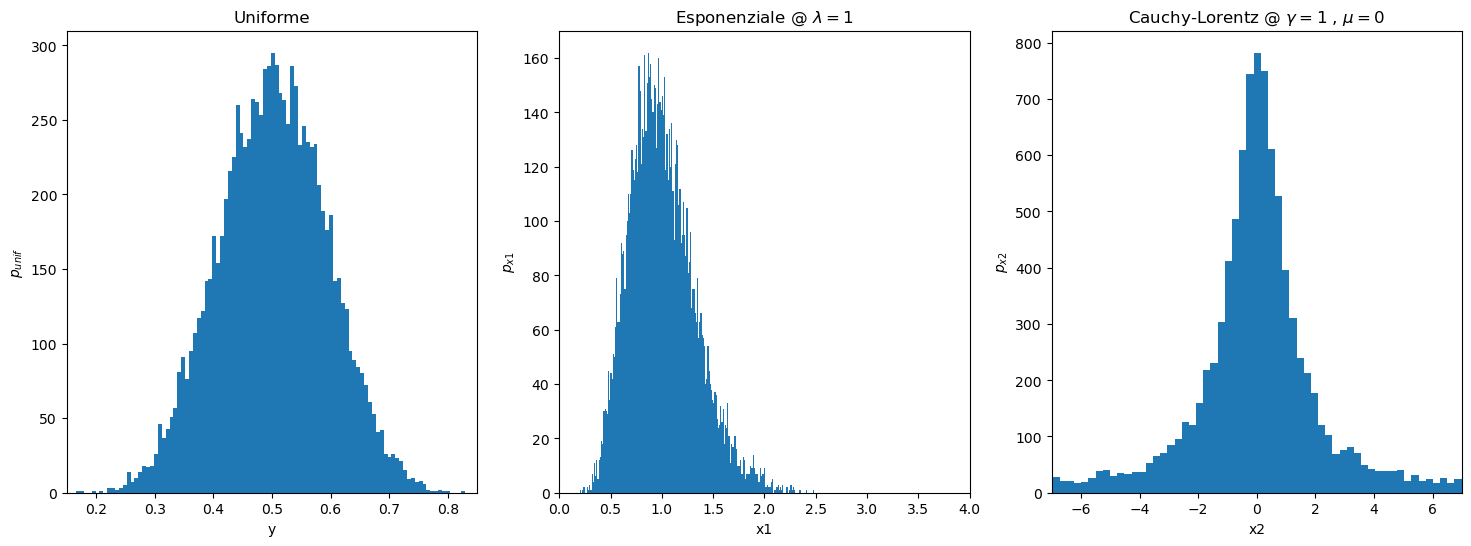

In [12]:
#Lettura file
filename = "Codici_finali/Esercizio_1.2/distributions_limit_N_10.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('y' , 'x1' , 'x2'), header = 1 )

#estrarre i dati dalle colonne del file di testo
MED['y'] = pd.to_numeric(MED['y'] , errors = 'coerce')
MED['x1'] = pd.to_numeric(MED['x1'] , errors = 'coerce')
MED['x2'] = pd.to_numeric(MED['x2'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
y_vector = MED['y']
x1_vector = MED['x1']
x2_vector = MED['x2']

print(min(x2_vector))

#istogramma che mostra, per ogni intervallo di valori selezionati, il numero di occorrenze
plt.figure(figsize = (18,6))

#uniforme
plt.subplot(1,3,1)
plt.hist(x = y_vector, bins = 100)
plt.title(r'Uniforme')
plt.xlim([0.15,0.85]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [0,1]
plt.xlabel('y')
plt.ylabel('$p_{unif}$')
#plt.show()

#esponenziale (lambda = 1)
plt.subplot(1,3,2)
plt.hist(x = x1_vector, bins = 200)
plt.title(r'Esponenziale @ $\lambda = 1$')
plt.xlim([0,4]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [0,4]
plt.xlabel('x1')
plt.ylabel('$p_{x1}$')
#plt.show()

#Cauchy_Lorentz (gamma = 1 , mu = 0)
plt.subplot(1,3,3)
plt.hist(x = x2_vector, bins = 50000)
plt.title(r'Cauchy-Lorentz @ $\gamma = 1$ , $\mu = 0$')
plt.xlim([-7,+7]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [-3,4]
plt.xlabel('x2')
plt.ylabel('$p_{x2}$')
plt.show()

N = 100:

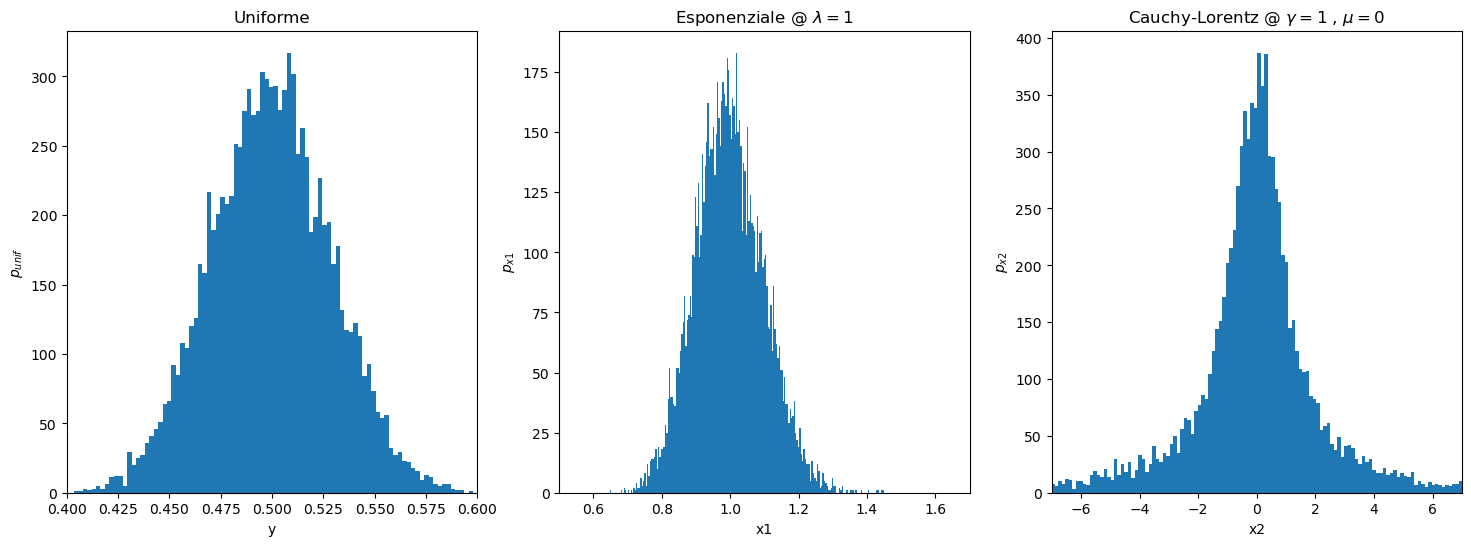

In [13]:
#Lettura file
filename = "Codici_finali/Esercizio_1.2/distributions_limit_N_100.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('y' , 'x1' , 'x2'), header = 1 )

#estrarre i dati dalle colonne del file di testo
MED['y'] = pd.to_numeric(MED['y'] , errors = 'coerce')
MED['x1'] = pd.to_numeric(MED['x1'] , errors = 'coerce')
MED['x2'] = pd.to_numeric(MED['x2'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
y_vector = MED['y']
x1_vector = MED['x1']
x2_vector = MED['x2']

#print(min(x2_vector))

#istogramma che mostra, per ogni intervallo di valori selezionati, il numero di occorrenze
plt.figure(figsize = (18,6))

#uniforme
plt.subplot(1,3,1)
plt.hist(x = y_vector, bins = 100)
plt.title(r'Uniforme')
plt.xlim([0.4,0.6]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [0,1]
plt.xlabel('y')
plt.ylabel('$p_{unif}$')
#plt.show()

#esponenziale (lambda = 0.8)
plt.subplot(1,3,2)
plt.hist(x = x1_vector, bins = 200)
plt.title(r'Esponenziale @ $\lambda = 1$')
plt.xlim([0.5,1.7]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [0,2]
plt.xlabel('x1')
plt.ylabel('$p_{x1}$')
#plt.show()

#Cauchy_Lorentz (gamma = 0.2 , mu = 0.52)
plt.subplot(1,3,3)
plt.hist(x = x2_vector, bins = 50000)
plt.title(r'Cauchy-Lorentz @ $\gamma = 1$ , $\mu = 0$')
plt.xlim([-7,+7]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [-3,4]
plt.xlabel('x2')
plt.ylabel('$p_{x2}$')
plt.show()

Come prima osservazione, si evidenzia come la somma di $N$ variabili, generate con distribuzione uniforme o esponenziale, tende a distribuirsi secondo una gaussiana per $N$ via via crescente, mentre la somma di distribuzioni Cauchy-Lorentz converge a una distribuzione Cauchy-Lorentz. Si può quindi effettuare un fit delle occorrenze raffigurate negli istogrammi, secondo le rispettive distribuzioni limite, al fine di estrarre una statistica.

In [14]:
from scipy.stats import norm

average_unif = np.average(y_vector)
variance_unif = np.var(y_vector, ddof = 1)

print("La media della distribuzione somma di 100 variabili distribuite uniformemente è: ", average_unif)
print("La varianza della distribuzione somma di 100 variabili distribuite uniformemente è: ", variance_unif)

average_exp = np.average(x1_vector)
variance_exp = np.var(x1_vector, ddof = 1)

print("La media della distribuzione somma di 100 variabili distribuite esponenzialmente è: ", average_exp)
print("La varianza della distribuzione somma di 100 variabili distribuite esponenzialmente è: ", variance_exp)

La media della distribuzione somma di 100 variabili distribuite uniformemente è:  0.499493294
La varianza della distribuzione somma di 100 variabili distribuite uniformemente è:  0.0008524437541335757
La media della distribuzione somma di 100 variabili distribuite esponenzialmente è:  0.9977131734000001
La varianza della distribuzione somma di 100 variabili distribuite esponenzialmente è:  0.010005245517046612


Un altro risultato degno di nota è l'evoluzione della varianza della distribuzione somma per $N$ crescente. Infatti, per la somma di distribuzioni esponenziali, essa decresce come l'inverso di $N$. 

Si studia anche la distribuzione gaussiana $p(x_3) = 1/(2\pi\sigma) \ e^{-x_3^2/(2\sigma^2)}$  con l'algoritmo di Box-Muller, che tornerà utile nelle successive esercitazioni.

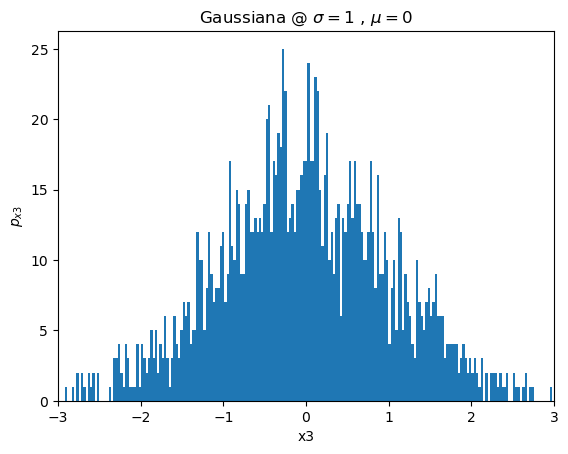

In [15]:
filename = "Codici_finali/Esercizio_1.2/distributions.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(0,3) , names = ('y' , 'x3'), header = 1 )

#estrarre i dati dalle colonne del file di testo
MED['y'] = pd.to_numeric(MED['y'] , errors = 'coerce')
MED['x3'] = pd.to_numeric(MED['x3'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
y_vector = MED['y']
x3_vector = MED['x3']

#istogramma
plt.hist(x = x3_vector, bins = 250)
plt.title(r'Gaussiana @ $\sigma = 1$ , $\mu = 0$')
plt.xlim([-3,+3]) 
plt.xlabel('x3')
plt.ylabel('$p_{x3}$')
plt.show()

Distribuzione della somma di $N = (2, 10, 100)$ variabili estratte dalla precedente distribuzione $p(x_3)$:

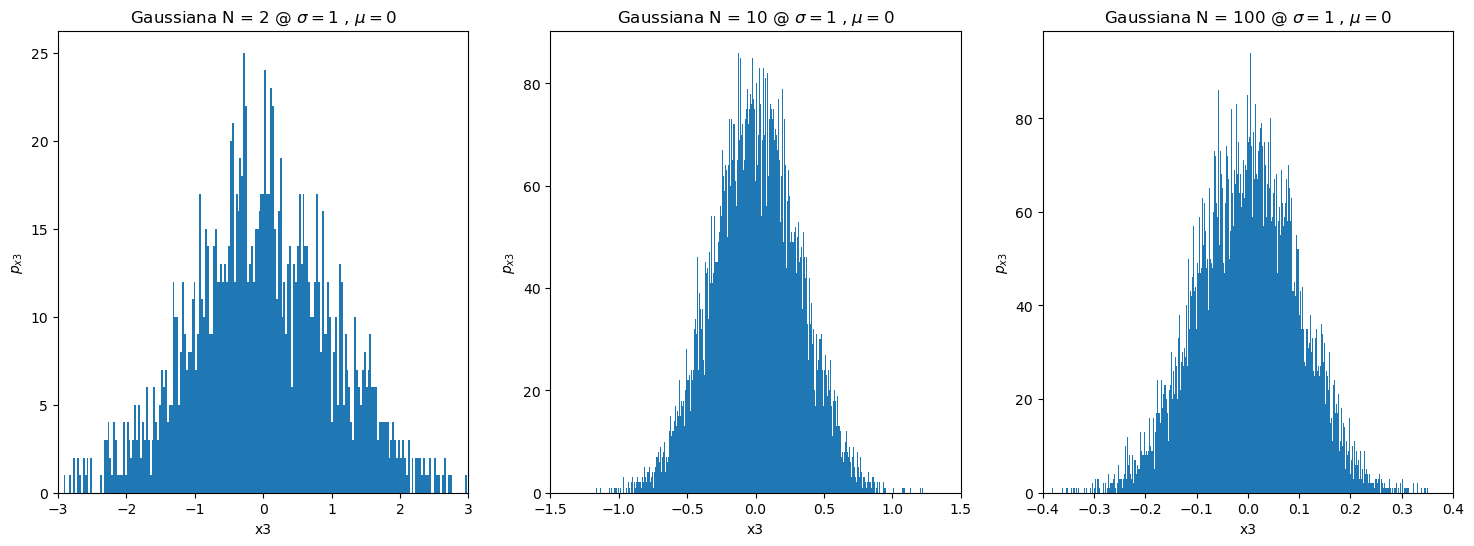

In [16]:
#Lettura file
filename_2 = "Codici_finali/Esercizio_1.2/distributions_limit_N_2.txt"
filename_10 = "Codici_finali/Esercizio_1.2/distributions_limit_N_10.txt"
filename_100 = "Codici_finali/Esercizio_1.2/distributions_limit_N_100.txt"
MED2 = pd.read_table(filename_2, delimiter = "\t" , usecols=(0,3) , names = ('y' , 'x3'), header = 1 )
MED10 = pd.read_table(filename_10, delimiter = "\t" , usecols=(0,3) , names = ('y' , 'x3'), header = 1 )
MED100 = pd.read_table(filename_100, delimiter = "\t" , usecols=(0,3) , names = ('y' , 'x3'), header = 1 )

#estrarre i dati dalle colonne del file di testo
MED2['y'] = pd.to_numeric(MED2['y'] , errors = 'coerce')
MED2['x3'] = pd.to_numeric(MED2['x3'] , errors = 'coerce')

MED10['y'] = pd.to_numeric(MED10['y'] , errors = 'coerce')
MED10['x3'] = pd.to_numeric(MED10['x3'] , errors = 'coerce')

MED100['y'] = pd.to_numeric(MED100['y'] , errors = 'coerce')
MED100['x3'] = pd.to_numeric(MED100['x3'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
y_vector_2 = MED2['y']
x3_vector_2 = MED2['x3']

y_vector_10 = MED10['y']
x3_vector_10 = MED10['x3']

y_vector_100 = MED100['y']
x3_vector_100 = MED100['x3']

#istogramma che mostra, per ogni intervallo di valori selezionati, il numero di occorrenze
plt.figure(figsize = (18,6))

#Gaussiana N = 2 (sigma = 1 , mu = 0)
plt.subplot(1,3,1)
plt.hist(x = x3_vector, bins = 250)
plt.title(r'Gaussiana N = 2 @ $\sigma = 1$ , $\mu = 0$')
plt.xlim([-3,+3]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [-3,4]
plt.xlabel('x3')
plt.ylabel('$p_{x3}$')

#Gaussiana N = 10 (sigma = 1 , mu = 0)
plt.subplot(1,3,2)
plt.hist(x = x3_vector_10, bins = 400)
plt.title(r'Gaussiana N = 10 @ $\sigma = 1$ , $\mu = 0$')
plt.xlim([-1.5,+1.5]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [-3,4]
plt.xlabel('x3')
plt.ylabel('$p_{x3}$')

#Gaussiana N = 100 (sigma = 1 , mu = 0)
plt.subplot(1,3,3)
plt.hist(x = x3_vector_100, bins = 400)
plt.title(r'Gaussiana N = 100 @ $\sigma = 1$ , $\mu = 0$')
plt.xlim([-0.4,+0.4]) #Vengono generati numeri nella coda della distribuzione molto distanti dal valore centroide, 
#per cui si effettua uno zoom sull'intervallo [-3,4]
plt.xlabel('x3')
plt.ylabel('$p_{x3}$')
plt.show()


L'andamento della distribuzione all'aumentare del numero $N$ di variabili $x_3$ suggerisce un accordo con il teorema del limite centrale. Data una distribuzione gaussiana di variabili $x_3$ con varianza $\sigma^2$, la distribuzione di probabilità data dalla sommatoria di $N$ di queste variabili avrà una varianza pari a $\sigma^2/N$:

In [17]:
from scipy.stats import norm

variance_g_2 = np.var(x3_vector_2, ddof = 1)
print("La varianza della distribuzione somma di 2 variabili distribuite secondo una gaussiana è: ", variance_g_2)
print("-- Valore atteso: ", 0.5)

variance_g_10 = np.var(x3_vector_10, ddof = 1)
print("La varianza della distribuzione somma di 10 variabili distribuite secondo una gaussiana è: ", variance_g_10)
print("-- Valore atteso: ", 0.1)

variance_g_100 = np.var(x3_vector_100, ddof = 1)
print("La varianza della distribuzione somma di 100 variabili distribuite secondo una gaussiana è: ", variance_g_100)
print("-- Valore atteso: ", 0.01)


La varianza della distribuzione somma di 2 variabili distribuite secondo una gaussiana è:  0.5005222071738963
-- Valore atteso:  0.5
La varianza della distribuzione somma di 10 variabili distribuite secondo una gaussiana è:  0.10096032050244806
-- Valore atteso:  0.1
La varianza della distribuzione somma di 100 variabili distribuite secondo una gaussiana è:  0.009863914980385153
-- Valore atteso:  0.01


**Esercizio 1.3:** Esperimento di Buffon per la determinazione del valore di $\pi$. Si costruisce il data-blocking con $M = 100 $ batch di $N = 50000$ tiri ciascuno.

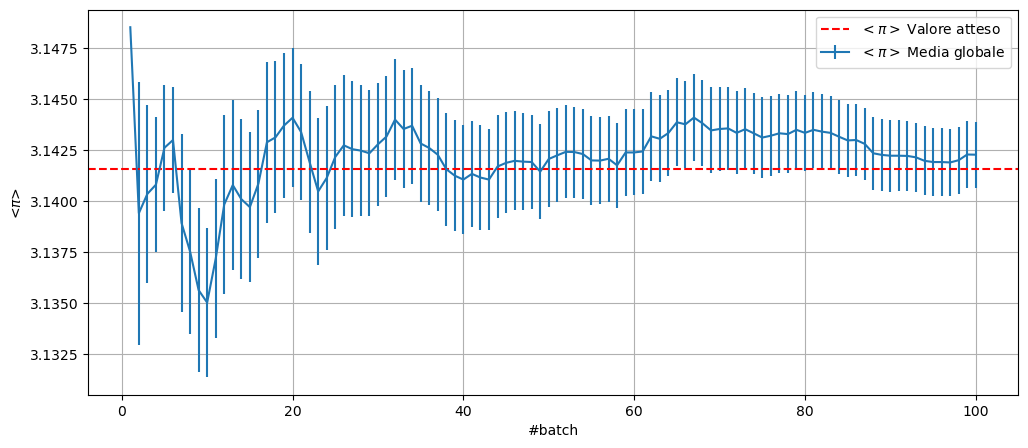

In [18]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

#Lettura file
filename = "Codici_finali/Esercizio_1.3/Buffon.txt"
MED = pd.read_table(filename, delimiter = "\t" , usecols=(1,2) , names = ('Media' , 'Stdev_Media'),header = 0 )

#estrarre i dati dalle colonne del file di testo
MED['Media'] = pd.to_numeric(MED['Media'] , errors = 'coerce')
MED['Stdev_Media'] = pd.to_numeric(MED['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Media_vector = MED['Media']
Stdev_Media_vector = MED['Stdev_Media']

#generare Array di interi da 1 a N
N = 100;
N_vector = np.zeros(N)

for i in range(0,N):
    N_vector[i] = i+1;

#disegnare grafico di media con barre d'errore (deviazione standard della media)
plt.figure(figsize = (12,5))
plt.errorbar(N_vector, Media_vector, yerr = Stdev_Media_vector, label = '$<\pi>$ Media globale')
plt.axhline(y=mt.pi, color='r', linestyle='--', label='$<\pi>$ Valore atteso')
plt.xlabel('#batch')
plt.ylabel('<$\pi$>')
plt.grid(True)
plt.legend()
plt.show()

Si osserva la convergenza della media globale di $<\pi>$ entro la deviazione standard della media dopo $100$ batch.